In [36]:
# Packages
import os 
import numpy as np 
import pandas as pd

In [43]:
# Reading in Data file:
Kareena_user_data = pd.read_csv(r"/Users/kareenakothari/Netflix_data_project/KareenasViewData.csv")

Kareena_user_data.info()
#print(Kareena_user_data.head())

# Understanding data:
Kareena_user_data.shape

# Making a data frame from this users data
Kareena_ = pd.DataFrame(Kareena_user_data)

#print(Kareena_.dtypes)



#Conversion of start time 
Kareena_['Start_Time'] = pd.to_datetime(Kareena['Start_Time'], utc=True)
#print(Kareena_.dtypes)




# Start time column into the data frame index
kkothari =Kareena_.set_index('Start_Time')
kkothari.index = kkothari.index.tz_convert('US/Pacific')
kkothari = kkothari.reset_index()
#print(kkothari.head(1))

# Duration Conversion
kkothari['Duration'] = pd.to_timedelta(kkothari['Duration'])
# Checking the data types
print(kkothari.dtypes)


# sorting to new dataframe
kkothari_= pd.DataFrame(kkothari)
print(kkothari_.head(1))






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    22067 non-null  int64 
 1   Start_Time    22067 non-null  object
 2   Profile_Name  22067 non-null  object
 3   Duration      22067 non-null  object
 4   Title         22067 non-null  object
 5   Device Type   22067 non-null  object
 6   Country       22067 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB
Unnamed: 0                    int64
Start_Time      datetime64[ns, UTC]
Profile_Name                 object
Duration                     object
Title                        object
Device Type                  object
Country                      object
dtype: object
                 Start_Time  Unnamed: 0 Profile_Name         Duration  \
0 2022-06-15 12:35:10-07:00        2337      Kareena  0 days 00:02:27   

                                               Titl

In [46]:
# Top 4 shows to focus on: 
# 1.Gilmore Girls
# 2. New Girl 
# 3. Grey's Anatomy 
# 4. Jane The Virgin 



# 1. Gilmore Girls:
Gilmore_Girls = kkothari_[kkothari_['Title'].str.contains('Gilmore Girls:', regex=False)]
print(Gilmore_Girls.shape) # (1827, 7)


#How much time have I spent watching Gilmore Girls? : 17 days 15:54:48
print(Gilmore_Girls['Duration'].sum())



# 2. New Girl 
New_Girl = kkothari_[kkothari_['Title'].str.contains('New Girl:', regex=False)]
print(New_Girl.shape) # (2577, 7)

#How much time have I spent watching New Girl?: 13 days 07:09:12
print(New_Girl['Duration'].sum()) 

# 3. Grey's Anatomy 
Greys_Anatomy = kkothari_[kkothari_['Title'].str.contains("Grey's Anatomy:", regex=False)]
print(Greys_Anatomy.shape) # (3033, 7)

#How much time have I spent watching Grey's Anatomy? : 24 days 14:56:18
print(Greys_Anatomy['Duration'].sum()) 

# 4. Jane The Virgin
Jane_The_Virgin = kkothari_[kkothari_['Title'].str.contains('Jane The Virgin:', regex=False)]
print(Jane_The_Virgin.shape) # (1456, 7)

#How much time have I spent watching Jane The Virgin? : 11 days 06:06:12
print(Jane_The_Virgin['Duration'].sum()) 



(1827, 7)
17 days 15:54:48
(2577, 7)
13 days 07:09:12
(3033, 7)
24 days 14:56:18
(1456, 7)
11 days 06:06:12


/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1999689719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gilmore_Girls['weekday'] = Gilmore_Girls['Start_Time'].dt.weekday
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1999689719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gilmore_Girls['hour'] = Gilmore_Girls['Start_Time'].dt.hour
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1999689719.py:16: SettingWithCopyWarning: 
A value is trying to b

                   Start_Time  Unnamed: 0 Profile_Name        Duration  \
937 2022-03-21 09:08:10-07:00        3274      Kareena 0 days 00:33:23   

                                                 Title    Device Type  \
937  Gilmore Girls: A Year in the Life: Limited Ser...  iPhone 12 Pro   

                Country  weekday  hour  
937  US (United States)        0     9  


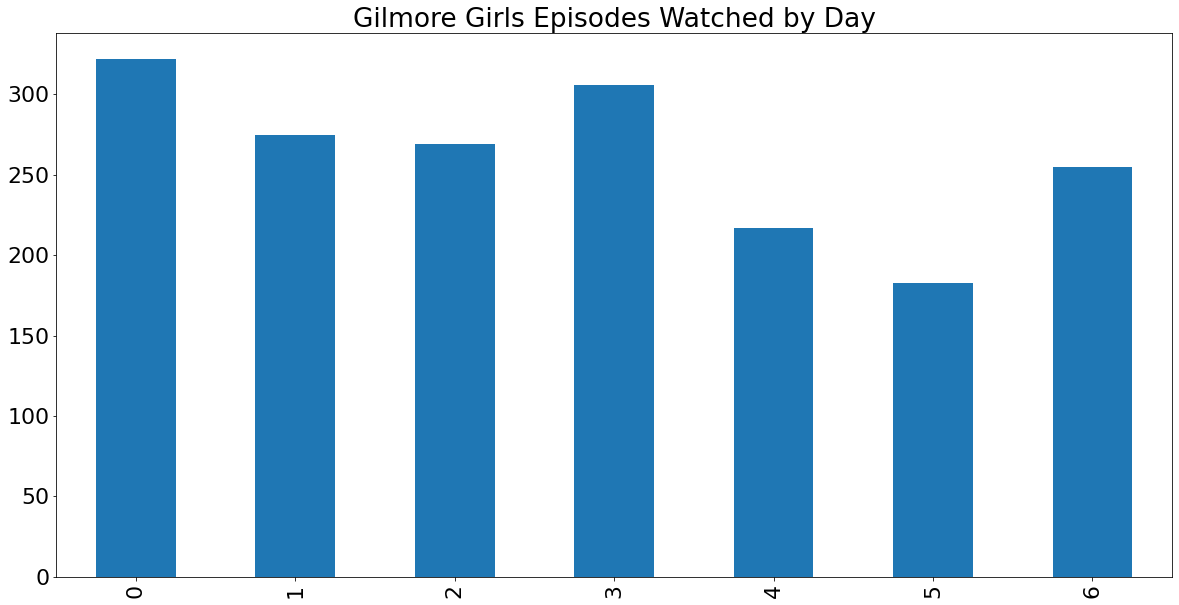

In [68]:
# Further Analysis: 
#When did I watch Gilmore Girls? 
    # On which days of the week have I watched the most Gilmore Girls Episodes?
    # During which hours of the day do I most often start Gilmore Girls episodes? 
    
Gilmore_Girls['weekday'] = Gilmore_Girls['Start_Time'].dt.weekday
Gilmore_Girls['hour'] = Gilmore_Girls['Start_Time'].dt.hour
print(Gilmore_Girls.head(1))


%matplotlib inline
import matplotlib


# Setting categorical, and define the order so the days are plotted (Mon-Sun)
Gilmore_Girls['weekday'] = pd.Categorical(Gilmore_Girls['weekday'],categories = [0,1,2,3,4,5,6], ordered = True)

# Created Gilmore Girls by day and count the rows for each weekday, assigned the result to the variable
Gilmore_G_by_day = Gilmore_Girls['weekday'].value_counts()

# Sort the index using categorical variable, Monday-0,Tuesday-1,Wednesday-2,Thursday-3,Friday-4,Saturday-5,Sunday-6
Gilmore_G_by_day = Gilmore_G_by_day.sort_index()

# Updating the size: for visibility
matplotlib.rcParams.update({'font.size':22})
Gilmore_G_by_day.plot(kind ='bar', figsize =(20,10),title = 'Gilmore Girls Episodes Watched by Day')


# Set categorical variable (0-23)
Gilmore_Girls['hour'] = pd.Categorical(Gilmore_Girls['hour'],categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered = True)
# Creating Gilmore girls by hour and count the rows for each hour, assigning the result to that variable
Gilmore_G_by_hour = Gilmore_Girls['hour'].value_counts()
#Sorting the index by categorical, midnight-0, 1am-1, 2am-2
Gilmore_G_by_hour = Gilmore_G_by_hour.sort_index()


<AxesSubplot:title={'center':'Gilmore Girl Episodes Watched By Hour'}>

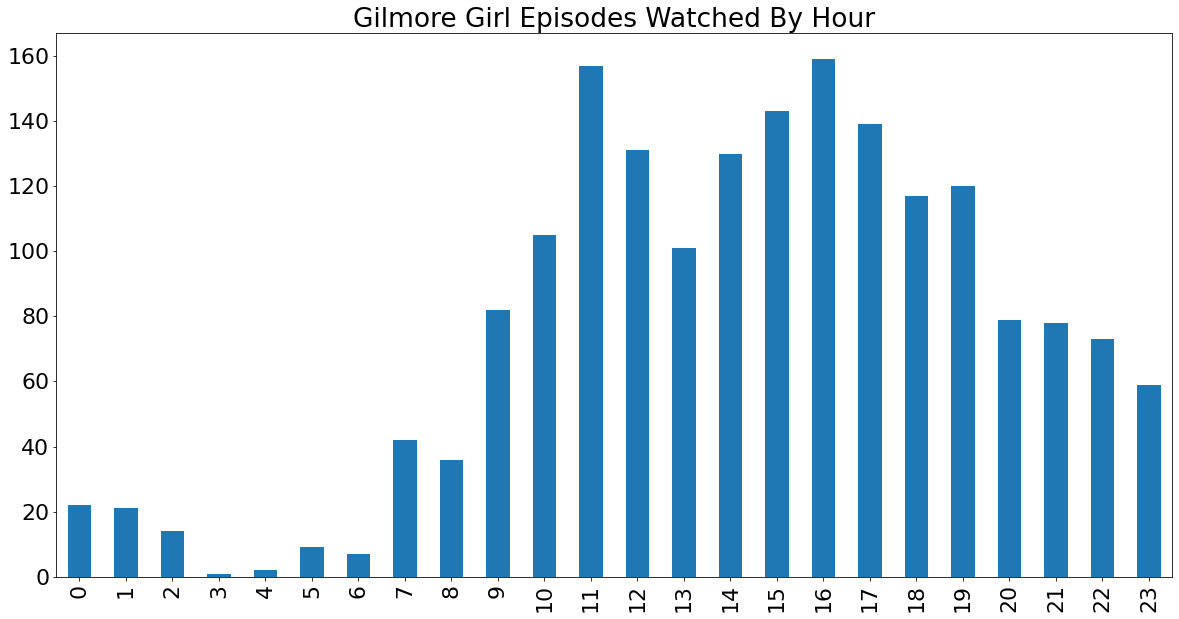

In [69]:
#Plotting the Gilmore G by hour
Gilmore_G_by_hour.plot(kind='bar',figsize=(20,10),title = 'Gilmore Girl Episodes Watched By Hour')

/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1389154893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Girl['weekday'] = New_Girl['Start_Time'].dt.weekday
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1389154893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Girl['hour'] = New_Girl['Start_Time'].dt.hour
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/1389154893.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

                    Start_Time  Unnamed: 0 Profile_Name        Duration  \
1924 2021-11-30 16:56:59-08:00        4261      Kareena 0 days 00:00:01   

                                                Title    Device Type  \
1924  New Girl: Season 4: Thanksgiving IV (Episode 9)  iPhone 12 Pro   

                 Country  weekday  hour  
1924  US (United States)        1    16  
AxesSubplot(0.125,0.125;0.775x0.755)


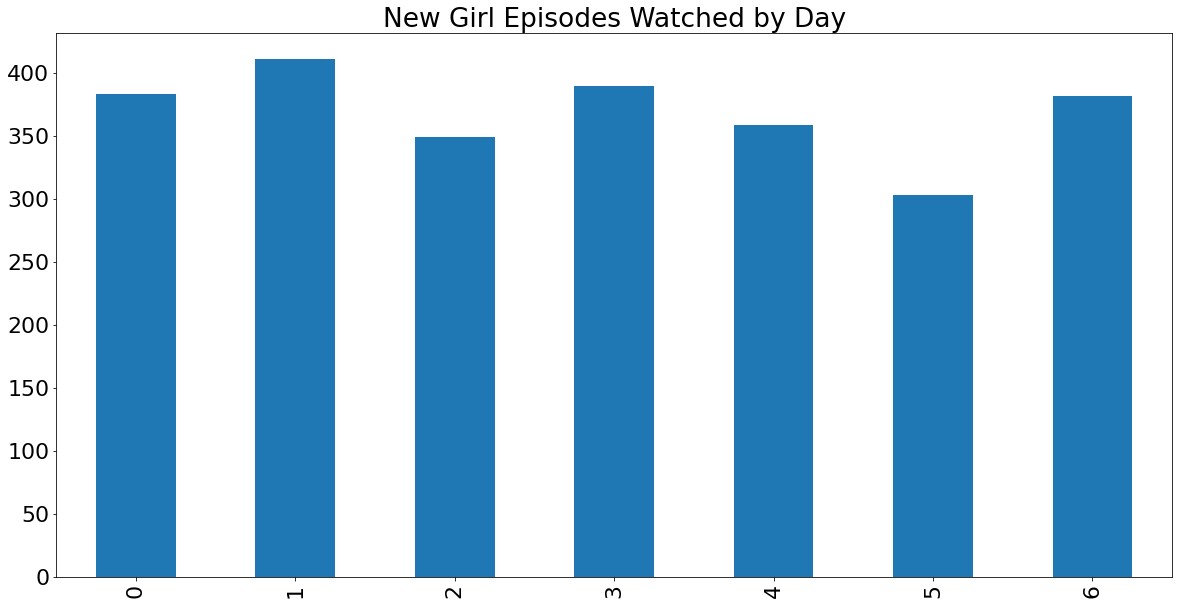

In [70]:
#When did I watch New Girl?  
    # On which days of the week have I watched the most New Girl Episodes?
    # During which hours of the day do I most often start New Girl episodes? 
New_Girl['weekday'] = New_Girl['Start_Time'].dt.weekday
New_Girl['hour'] = New_Girl['Start_Time'].dt.hour
print(New_Girl.head(1))


%matplotlib inline
import matplotlib


# Setting categorical, and define the order so the days are plotted (Mon-Sun)
New_Girl['weekday'] = pd.Categorical(New_Girl['weekday'],categories = [0,1,2,3,4,5,6], ordered = True)

# Created New Girl by day and count the rows for each weekday, assigned the result to the variable
New_G_by_day = New_Girl['weekday'].value_counts()

# Sort the index using categorical variable, Monday-0,Tuesday-1,Wednesday-2,Thursday-3,Friday-4,Saturday-5,Sunday-6
New_G_by_day = New_G_by_day.sort_index()

# Updating the size: for visibility
matplotlib.rcParams.update({'font.size':22})
print(New_G_by_day.plot(kind ='bar', figsize =(20,10),title = 'New Girl Episodes Watched by Day'))


# Set categorical variable (0-23)
New_Girl['hour'] = pd.Categorical(New_Girl['hour'],categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered = True)
# Creating Gilmore girls by hour and count the rows for each hour, assigning the result to that variable
New_G_by_hour = New_Girl['hour'].value_counts()
#Sorting the index by categorical, midnight-0, 1am-1, 2am-2
New_G_by_hour = New_G_by_hour.sort_index()


AxesSubplot(0.125,0.125;0.775x0.755)


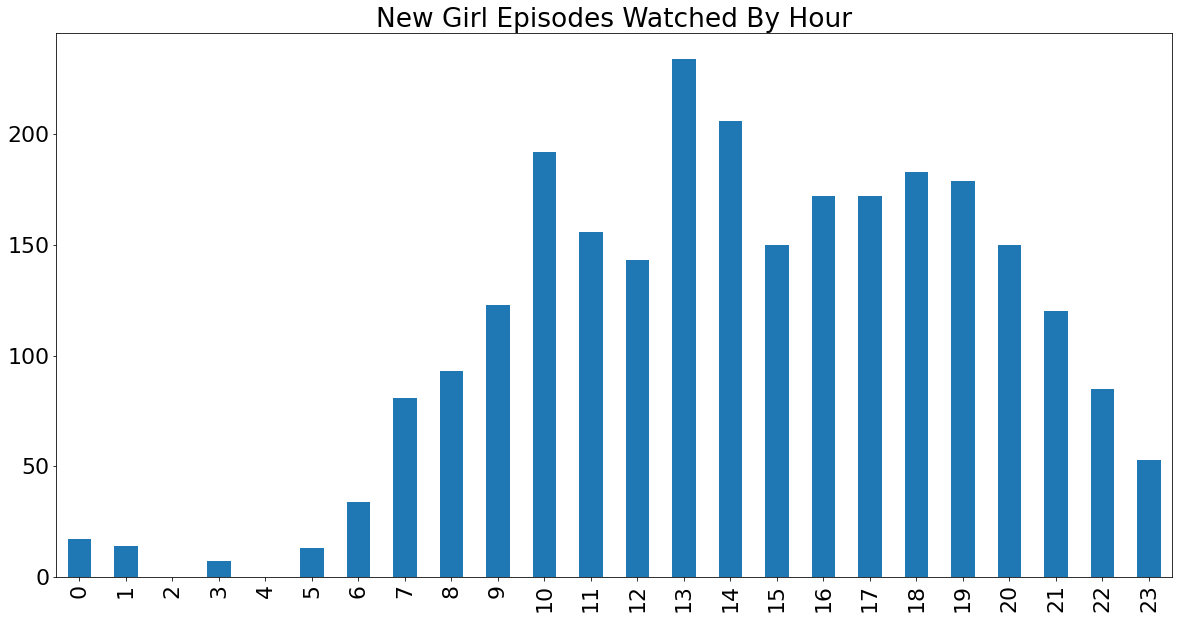

In [71]:
#Plotting the New Girl by hour
print(New_G_by_hour.plot(kind='bar',figsize=(20,10),title = 'New Girl Episodes Watched By Hour'))

/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/11251654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Greys_Anatomy['weekday'] = Greys_Anatomy['Start_Time'].dt.weekday
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/11251654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Greys_Anatomy['hour'] = Greys_Anatomy['Start_Time'].dt.hour
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/11251654.py:14: SettingWithCopyWarning: 
A value is trying to be set 

                 Start_Time  Unnamed: 0 Profile_Name        Duration  \
0 2022-06-15 12:35:10-07:00        2337      Kareena 0 days 00:02:27   

                                               Title    Device Type  \
0  Grey's Anatomy: Season 17: Someone Saved My Li...  iPhone 12 Pro   

              Country  weekday  hour  
0  US (United States)        2    12  


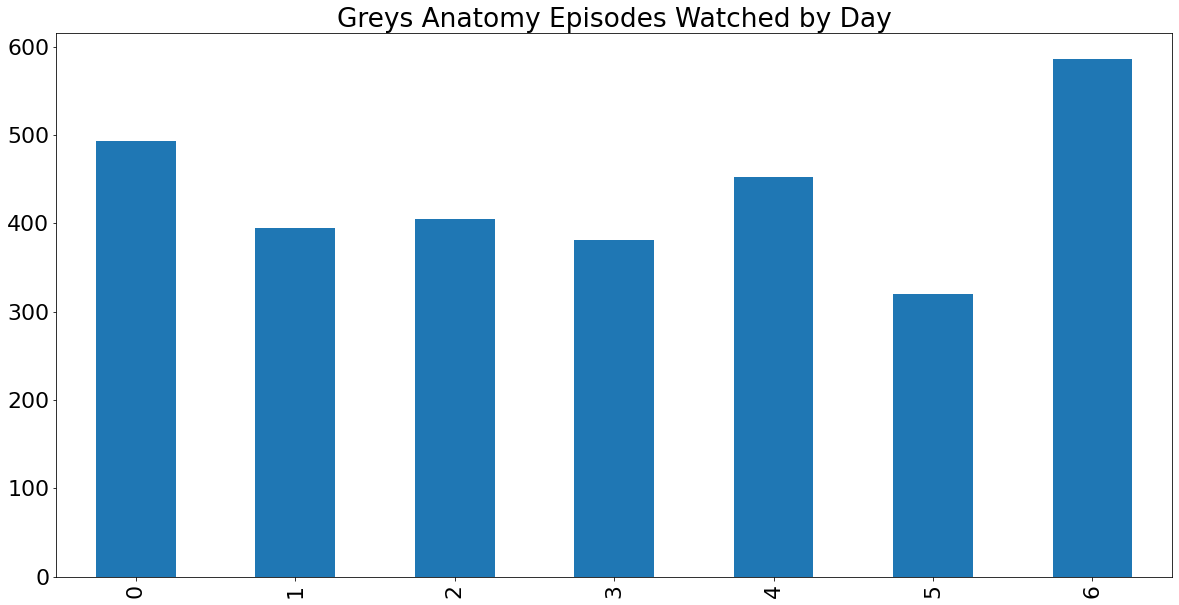

In [72]:
#When did I watch Grey's Anatomy ? 
    # On which days of the week have I watched the most Grey's Anatomy Episodes?
    # During which hours of the day do I most often start Grey's Anatomy episodes? 
Greys_Anatomy['weekday'] = Greys_Anatomy['Start_Time'].dt.weekday
Greys_Anatomy['hour'] = Greys_Anatomy['Start_Time'].dt.hour
print(Greys_Anatomy.head(1))


%matplotlib inline
import matplotlib


# Setting categorical, and define the order so the days are plotted (Mon-Sun)
Greys_Anatomy['weekday'] = pd.Categorical(Greys_Anatomy['weekday'],categories = [0,1,2,3,4,5,6], ordered = True)

# Created Grey's Anatomy by day and count the rows for each weekday, assigned the result to the variable
Greys_Anatomy_by_day = Greys_Anatomy['weekday'].value_counts()

# Sort the index using categorical variable, Monday-0,Tuesday-1,Wednesday-2,Thursday-3,Friday-4,Saturday-5,Sunday-6
Greys_Anatomy_by_day = Greys_Anatomy_by_day.sort_index()

# Updating the size: for visibility
matplotlib.rcParams.update({'font.size':22})
Greys_Anatomy_by_day.plot(kind ='bar', figsize =(20,10),title = 'Greys Anatomy Episodes Watched by Day')


# Set categorical variable (0-23)
Greys_Anatomy['hour'] = pd.Categorical(Greys_Anatomy['hour'],categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered = True)
# Creating Gilmore girls by hour and count the rows for each hour, assigning the result to that variable
Greys_Anatomy_by_hour = Greys_Anatomy['hour'].value_counts()
#Sorting the index by categorical, midnight-0, 1am-1, 2am-2
Greys_Anatomy_by_hour = Greys_Anatomy_by_hour.sort_index()


<AxesSubplot:title={'center':'Greys Anatomy Episodes Watched by Day'}>

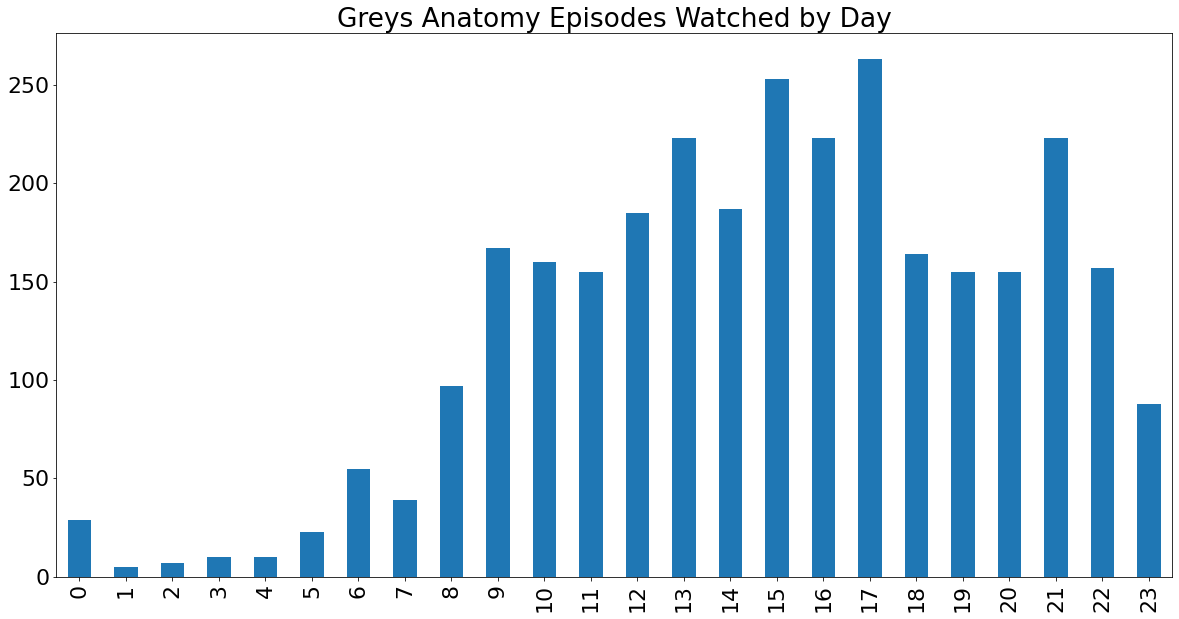

In [73]:
#Plotting the Greys anatomy episodes by hour
Greys_Anatomy_by_hour.plot(kind ='bar', figsize =(20,10),title = 'Greys Anatomy Episodes Watched by Day')

/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/702187719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jane_The_Virgin['weekday'] = Jane_The_Virgin['Start_Time'].dt.weekday
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/702187719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jane_The_Virgin['hour'] = Jane_The_Virgin['Start_Time'].dt.hour
/var/folders/vs/67nvsqbs759bcyjmlyz4jswm0000gn/T/ipykernel_12454/702187719.py:14: SettingWithCopyWarning: 
A value is trying

                    Start_Time  Unnamed: 0 Profile_Name        Duration  \
1924 2021-11-30 16:56:59-08:00        4261      Kareena 0 days 00:00:01   

                                                Title    Device Type  \
1924  New Girl: Season 4: Thanksgiving IV (Episode 9)  iPhone 12 Pro   

                 Country weekday hour  
1924  US (United States)       1   16  
AxesSubplot(0.125,0.125;0.775x0.755)


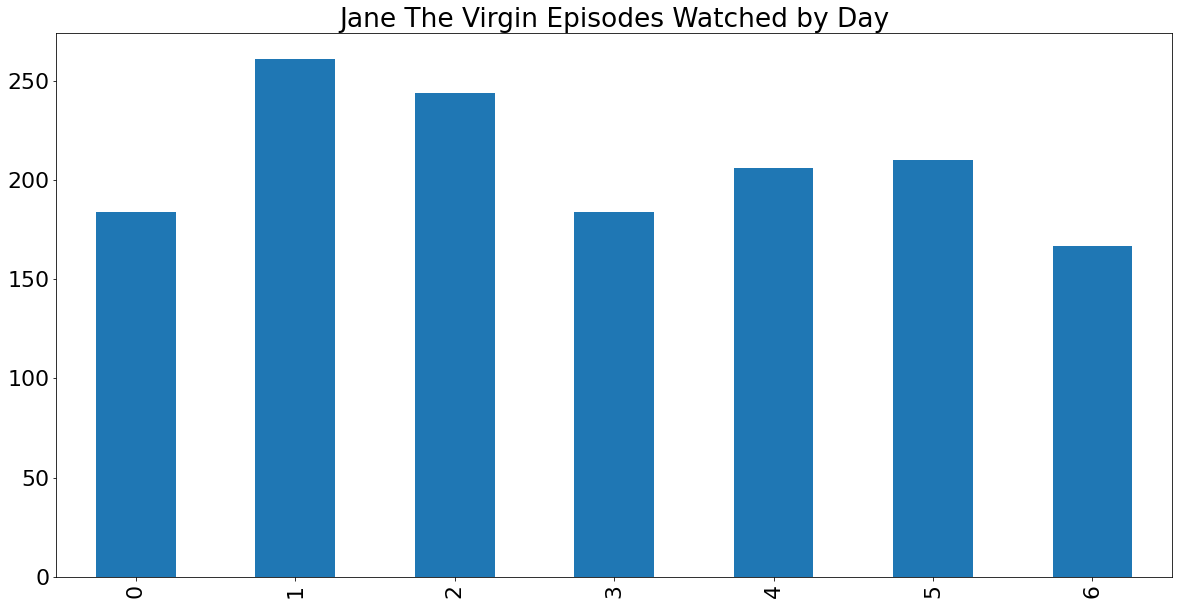

In [74]:
#When did I watch Jane The Virgin? 
    # On which days of the week have I watched the most Jane The Virgin Episodes?
    # During which hours of the day do I most often start Jane The Virgin episodes? 
Jane_The_Virgin['weekday'] = Jane_The_Virgin['Start_Time'].dt.weekday
Jane_The_Virgin['hour'] = Jane_The_Virgin['Start_Time'].dt.hour
print(New_Girl.head(1))


%matplotlib inline
import matplotlib


# Setting categorical, and define the order so the days are plotted (Mon-Sun)
Jane_The_Virgin['weekday'] = pd.Categorical(Jane_The_Virgin['weekday'],categories = [0,1,2,3,4,5,6], ordered = True)

# Created New Girl by day and count the rows for each weekday, assigned the result to the variable
Jane_theV_by_day = Jane_The_Virgin['weekday'].value_counts()

# Sort the index using categorical variable, Monday-0,Tuesday-1,Wednesday-2,Thursday-3,Friday-4,Saturday-5,Sunday-6
Jane_theV_by_day = Jane_theV_by_day.sort_index()

# Updating the size: for visibility
matplotlib.rcParams.update({'font.size':22})
print(Jane_theV_by_day.plot(kind ='bar', figsize =(20,10),title = 'Jane The Virgin Episodes Watched by Day'))


# Set categorical variable (0-23)
Jane_The_Virgin['hour'] = pd.Categorical(Jane_The_Virgin['hour'],categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered = True)
# Creating Gilmore girls by hour and count the rows for each hour, assigning the result to that variable
Jane_theV_by_hour = Jane_The_Virgin['hour'].value_counts()
#Sorting the index by categorical, midnight-0, 1am-1, 2am-2
Jane_theV_by_hour = Jane_theV_by_hour.sort_index()



In [ ]:
#Plotting the Jane the virgin episodes by hour
print(Jane_theV_by_hour.plot(kind='bar',figsize=(20,10),title = 'Jane The Virgin Episodes Watched By Hour'))    
